In [13]:
import os
os.chdir("C:/Users/TTBDONMEZ/Desktop/UDACITY_DATA_SCIENTIST/TheDataScienceProcess")

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df_calendar = pd.read_csv('./seattle-calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [15]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [16]:
availability=df_calendar['available'].value_counts().reset_index()

availability

#count of available =f and nulls of price are the same , that I can understand if not available there is no price

,index,available
0,t,934542
1,f,459028


In [19]:
df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [22]:
availability_date=df_calendar.drop(['listing_id','price'], axis=1)

In [23]:
availability_date

,date,available
0,2016-01-04,t
1,2016-01-05,t
2,2016-01-06,f
3,2016-01-07,f
4,2016-01-08,f
...,...,...
1393565,2016-12-29,f
1393566,2016-12-30,f
1393567,2016-12-31,f
1393568,2017-01-01,f


In [25]:
#changing data type of date column to datetime
availability_date['date'] = pd.to_datetime(availability_date['date'])

In [26]:
#changing data column to be YearMonth
availability_date['date'] = availability_date['date'].map(lambda x: 100*x.year + x.month)

In [27]:
available_monthly=pd.DataFrame(availability_date.query("available=='t'")['date'].value_counts())

available_monthly=available_monthly.rename(columns={'date':'available_count'})

available_monthly.reset_index(inplace=True)

available_monthly=available_monthly.rename(columns={'index':'YearMonth'})

available_monthly

,YearMonth,available_count
0,201612,87061
1,201603,83938
2,201610,82438
3,201611,81780
4,201605,79971
5,201609,77246
6,201606,77244
7,201608,76347
8,201604,76037
9,201607,74222


In [28]:
total_monthly=pd.DataFrame(availability_date['date'].value_counts())

total_monthly=total_monthly.rename(columns={'date':'total_count'})

total_monthly.reset_index(inplace=True)

total_monthly=total_monthly.rename(columns={'index':'YearMonth'})

total_monthly

,YearMonth,total_count
0,201612,118358
1,201608,118358
2,201610,118358
3,201605,118358
4,201607,118358
5,201603,118358
6,201609,114540
7,201611,114540
8,201604,114540
9,201606,114540


In [30]:
#merging two data frames 
avail_months = pd.merge(available_monthly,
                 total_monthly,
                 on='YearMonth')

avail_months

,YearMonth,available_count,total_count
0,201612,87061,118358
1,201603,83938,118358
2,201610,82438,118358
3,201611,81780,114540
4,201605,79971,118358
5,201609,77246,114540
6,201606,77244,114540
7,201608,76347,118358
8,201604,76037,114540
9,201607,74222,118358


In [31]:
avail_months['perc']=(avail_months['available_count']/avail_months['total_count'])*100

In [32]:
avail_months #adding percentage of available listings to data frame

,YearMonth,available_count,total_count,perc
0,201612,87061,118358,73.557343
1,201603,83938,118358,70.918738
2,201610,82438,118358,69.651397
3,201611,81780,114540,71.398638
4,201605,79971,118358,67.567042
5,201609,77246,114540,67.440196
6,201606,77244,114540,67.438449
7,201608,76347,118358,64.505145
8,201604,76037,114540,66.384669
9,201607,74222,118358,62.709745


In [36]:
avail_months_perc=avail_months.drop(['available_count','total_count'], axis=1)

In [50]:
avail_months_perc.sort_index(inplace=True)

In [51]:
avail_months_perc

,perc
YearMonth,
201601,55.413268
201602,66.220805
201603,70.918738
201604,66.384669
201605,67.567042
201606,67.438449
201607,62.709745
201608,64.505145
201609,67.440196


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

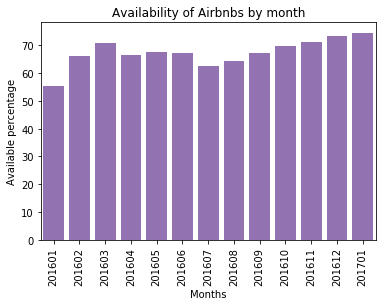

In [60]:
base_color = sns.color_palette()[4]

sns.barplot(avail_months_perc.index.values,avail_months_perc.perc, color = base_color)
plt.xlabel('Months')
plt.ylabel('Available percentage')
plt.title('Availability of Airbnbs by month')
plt.xticks(rotation = 90)